<a href="https://colab.research.google.com/github/Nihal-18/The-Sparks-Foundation-Internship/blob/main/Solution_7_Stock_Price_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# NAME: NIHAL M TODANKAR

## TASK: STOCK MARKET PREDICTION USING NUMERICAL AND TEXTUAL ANALYSIS

# DATA SCIENCE AND BUSINESS ANALYTICS INTERNSHIP

# THE SPARKS FOUNDATION

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sb

from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

import nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from textblob import TextBlob # for extracting the sentiment out of the news headlines

import re
import os

# importing library for acquiring numerical data from yahoo finance
from pandas_datareader.data import  DataReader
from datetime import datetime

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


/usr/local/lib/python3.6/dist-packages/nltk/twitter/__init__.py:20: UserWarning: The twython library has not been installed. Some functionality from the twitter package will not be available.
  warnings.warn("The twython library has not been installed. "


In [2]:
df= pd.read_csv('/content/drive/MyDrive/Sparks_inernship_datasets/india-news-headlines.csv')

In [3]:
df.head()

,publish_date,headline_category,headline_text
0,20010101,sports.wwe,win over cena satisfying but defeating underta...
1,20010102,unknown,Status quo will not be disturbed at Ayodhya; s...
2,20010102,unknown,Fissures in Hurriyat over Pak visit
3,20010102,unknown,America's unwanted heading for India?
4,20010102,unknown,For bigwigs; it is destination Goa


In [4]:
df.shape

(3297172, 3)

In [5]:
df.drop(columns= ['headline_category'], axis= 1, inplace= True)

In [6]:
df.head()

,publish_date,headline_text
0,20010101,win over cena satisfying but defeating underta...
1,20010102,Status quo will not be disturbed at Ayodhya; s...
2,20010102,Fissures in Hurriyat over Pak visit
3,20010102,America's unwanted heading for India?
4,20010102,For bigwigs; it is destination Goa


# changing the date format using to pd.to_datetime

In [7]:
df['publish_date'] = pd.to_datetime(df['publish_date'], format= '%Y%m%d')

In [8]:
df

,publish_date,headline_text
0,2001-01-01,win over cena satisfying but defeating underta...
1,2001-01-02,Status quo will not be disturbed at Ayodhya; s...
2,2001-01-02,Fissures in Hurriyat over Pak visit
3,2001-01-02,America's unwanted heading for India?
4,2001-01-02,For bigwigs; it is destination Goa
...,...,...
3297167,2020-06-30,why tiktok removed 1 65 crore videos in india
3297168,2020-06-30,apurva asrani calls alia bhatts mother soni ra...
3297169,2020-06-30,kangana ranaut gets a doll version of herself ...
3297170,2020-06-30,meezaan jaffrey reminisces his childhood days ...


In [9]:
df['headline_text'] = df.groupby(['publish_date']).transform(lambda news : ' '.join(news)) 

In [10]:
df

,publish_date,headline_text
0,2001-01-01,win over cena satisfying but defeating underta...
1,2001-01-02,Status quo will not be disturbed at Ayodhya; s...
2,2001-01-02,Status quo will not be disturbed at Ayodhya; s...
3,2001-01-02,Status quo will not be disturbed at Ayodhya; s...
4,2001-01-02,Status quo will not be disturbed at Ayodhya; s...
...,...,...
3297167,2020-06-30,Detective Byomkesh Bakshy! Edge of Tomorrow Fi...
3297168,2020-06-30,Detective Byomkesh Bakshy! Edge of Tomorrow Fi...
3297169,2020-06-30,Detective Byomkesh Bakshy! Edge of Tomorrow Fi...
3297170,2020-06-30,Detective Byomkesh Bakshy! Edge of Tomorrow Fi...


# Dropping duplicates and resetting the index

In [11]:
df = df.drop_duplicates() 
df.reset_index(inplace=True,drop=True)

In [12]:
print('The Textual Dataset\n\n')
print(df.shape,'\n\n\n\n')
df

The Textual Dataset


(7080, 2) 






,publish_date,headline_text
0,2001-01-01,win over cena satisfying but defeating underta...
1,2001-01-02,Status quo will not be disturbed at Ayodhya; s...
2,2001-01-03,Powerless north India gropes in the dark Think...
3,2001-01-04,The string that pulled Stephen Hawking to Indi...
4,2001-01-05,Light combat craft takes India into club class...
...,...,...
7075,2020-06-26,Containment zone residents slam high prices ch...
7076,2020-06-27,like me i wont let you have a toxic relationsh...
7077,2020-06-28,Atanu Ghosh plans to rewrite old scripts to ma...
7078,2020-06-29,6 hot and stylish bikini looks of Katrina Kaif...


# Extracting the polarity from the news headlines of the dataset


In [13]:
polar= []
for i in range(df.shape[0]):

  polar.append(TextBlob(df['headline_text'][i]).sentiment.polarity)

print(polar)

[0.43333333333333335, 0.15133333333333332, 0.08846153846153845, 0.08796128734653325, 0.2620243128964059, 0.24848484848484853, -0.06070843570843573, -0.01921382189239333, -0.0038371520078837014, 0.0, 0.25, 0.07964015151515151, 0.10603070175438595, 0.014259641873278233, 0.1584022038567493, 0.07222222222222224, 0.04426406926406926, 0.1588425925925926, 0.11926961926961926, 0.034375, 0.07499094415726815, 0.159375, 0.12814294660312806, 0.03787878787878789, -0.03348187759952465, 0.04696969696969695, -0.06615259740259741, 0.17859848484848487, 0.17352941176470593, 0.09334415584415583, 0.12190968122786305, 0.03434027777777778, -0.10743145743145745, -0.054364874393283476, 0.13085664335664335, -0.03816738816738819, 0.25192307692307697, 0.10606060606060606, 0.19708175505050501, 0.01629389129389128, -0.09786438604797978, 0.1923214285714286, 0.06134259259259259, -0.11868131868131868, 0.058566433566433554, 0.0909090909090909, -0.0009090909090909103, 0.1521543560606061, -0.025, 0.0, -0.0666666666666666

# Extracting the subjectivity from the news dataset


In [14]:
subject= []

for j in range(df.shape[0]):

  subject.append(TextBlob(df['headline_text'][j]).sentiment.subjectivity)

print(subject)

[0.6333333333333333, 0.2823333333333333, 0.40769230769230763, 0.44684727840465543, 0.47661205073995766, 0.4393939393939394, 0.3653562653562654, 0.4146529066171923, 0.5019339738851935, 0.0, 0.3, 0.2890782828282828, 0.2605263157894737, 0.45652203856749307, 0.2815426997245179, 0.38333333333333325, 0.4074675324675324, 0.28708994708994706, 0.3754856254856254, 0.30833333333333335, 0.412406015037594, 0.246875, 0.4302541544477028, 0.4666666666666666, 0.37706476530005945, 0.33878787878787875, 0.40627705627705624, 0.375189393939394, 0.49950980392156863, 0.3137445887445888, 0.5400885478158205, 0.5068055555555555, 0.4026695526695526, 0.5170175783812148, 0.29069930069930067, 0.4719336219336219, 0.4, 0.2924242424242425, 0.38646464646464646, 0.36299903799903804, 0.4221590909090909, 0.4660119047619046, 0.38587962962962963, 0.44267399267399266, 0.3503496503496504, 0.5428571428571428, 0.41141414141414134, 0.5546875000000001, 0.45, 0.0, 0.08333333333333333, 0.5274621212121212, 0.0, 0.38223140495867763, 0

In [15]:
df['Polarity']= polar

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [16]:
df['Subjectivity'] = subject

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [17]:
df

,publish_date,headline_text,Polarity,Subjectivity
0,2001-01-01,win over cena satisfying but defeating underta...,0.433333,0.633333
1,2001-01-02,Status quo will not be disturbed at Ayodhya; s...,0.151333,0.282333
2,2001-01-03,Powerless north India gropes in the dark Think...,0.088462,0.407692
3,2001-01-04,The string that pulled Stephen Hawking to Indi...,0.087961,0.446847
4,2001-01-05,Light combat craft takes India into club class...,0.262024,0.476612
...,...,...,...,...
7075,2020-06-26,Containment zone residents slam high prices ch...,0.068333,0.381841
7076,2020-06-27,like me i wont let you have a toxic relationsh...,0.079290,0.398808
7077,2020-06-28,Atanu Ghosh plans to rewrite old scripts to ma...,0.057636,0.402636
7078,2020-06-29,6 hot and stylish bikini looks of Katrina Kaif...,0.061956,0.396828


In [18]:
len(df['headline_text'])

7080

# Acquiring Sentiment from the news headlines

In [19]:
sa = SentimentIntensityAnalyzer()

In [23]:
def SentimentAnlyser(txt, label):

  list1= []
  a= df.shape[0]

  if label== 0:

    for v in range(a):
      list1.append(sa.polarity_scores(txt[v])['compound'])

  elif label== -1:

    for v in range(a):
      list1.append(sa.polarity_scores(txt[v])['neg'])

  elif label== 1:

    for v in range(a):
      list1.append(sa.polarity_scores(txt[v])['pos']) 

  else:

    for v in range(a):
      list1.append(sa.polarity_scores(txt[v])['neu'])

  return list1

In [24]:
df['Compound']= SentimentAnlyser(df['headline_text'], label= 0)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [26]:
df['Negative']= SentimentAnlyser(df['headline_text'],label= -1)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [28]:
df['Positive']= SentimentAnlyser(df['headline_text'], label= 1)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [30]:
df['Neutral']= SentimentAnlyser(df['headline_text'], label= 2)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [32]:
df

,publish_date,headline_text,Polarity,Subjectivity,Compound,Negative,Positive,Neutral
0,2001-01-01,win over cena satisfying but defeating underta...,0.433333,0.633333,-0.0000,0.230,0.297,0.473
1,2001-01-02,Status quo will not be disturbed at Ayodhya; s...,0.151333,0.282333,-0.9811,0.122,0.071,0.807
2,2001-01-03,Powerless north India gropes in the dark Think...,0.088462,0.407692,-0.2640,0.122,0.111,0.766
3,2001-01-04,The string that pulled Stephen Hawking to Indi...,0.087961,0.446847,0.8738,0.100,0.103,0.797
4,2001-01-05,Light combat craft takes India into club class...,0.262024,0.476612,0.9633,0.124,0.154,0.722
...,...,...,...,...,...,...,...,...
7075,2020-06-26,Containment zone residents slam high prices ch...,0.068333,0.381841,-0.9999,0.162,0.089,0.749
7076,2020-06-27,like me i wont let you have a toxic relationsh...,0.079290,0.398808,-0.9999,0.159,0.092,0.749
7077,2020-06-28,Atanu Ghosh plans to rewrite old scripts to ma...,0.057636,0.402636,-0.9999,0.147,0.074,0.779
7078,2020-06-29,6 hot and stylish bikini looks of Katrina Kaif...,0.061956,0.396828,-0.9999,0.142,0.085,0.773


# Loading Numerical Data

In [33]:
pdf= pd.read_csv('/content/drive/MyDrive/Sparks_inernship_datasets/^BSESN.csv')

In [34]:
pdf.shape

(4868, 7)

In [35]:
pdf

,Date,Open,High,Low,Close,Adj Close,Volume
0,2001-01-02,3953.219971,4028.570068,3929.370117,4018.879883,4018.879883,0.0
1,2001-01-03,3977.580078,4067.659912,3977.580078,4060.020020,4060.020020,0.0
2,2001-01-04,4180.970215,4180.970215,4109.549805,4115.370117,4115.370117,0.0
3,2001-01-05,4116.339844,4195.009766,4115.350098,4183.729980,4183.729980,0.0
4,2001-01-08,4164.759766,4206.720215,4101.529785,4120.430176,4120.430176,0.0
...,...,...,...,...,...,...,...
4863,2020-06-23,35015.730469,35482.160156,34843.691406,35430.429688,35430.429688,25200.0
4864,2020-06-24,35679.738281,35706.550781,34794.929688,34868.980469,34868.980469,26600.0
4865,2020-06-25,34525.390625,35081.609375,34499.781250,34842.101563,34842.101563,24600.0
4866,2020-06-26,35144.781250,35254.878906,34910.339844,35171.269531,35171.269531,24800.0


# Closing Points of BSE SENSEX

Text(0.5, 1.0, 'BSE SENSEX CLOSING POINTS')

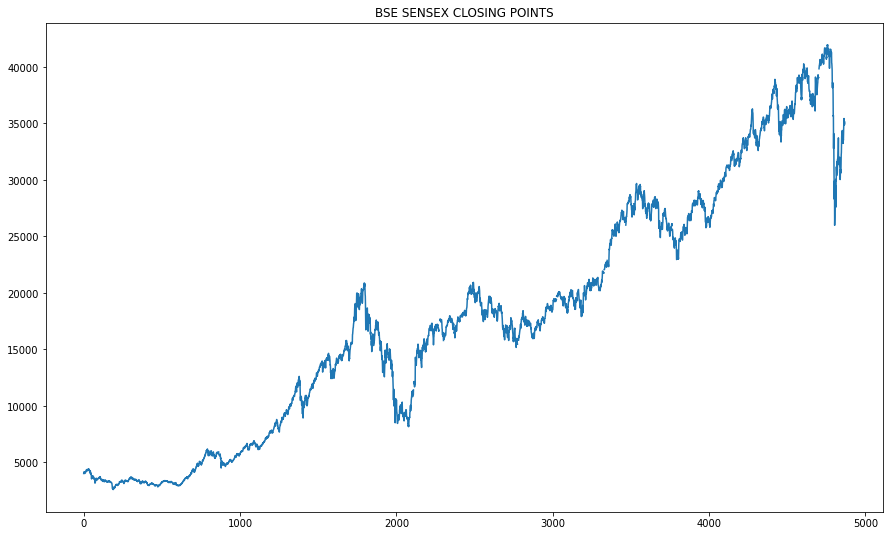

In [41]:
plt.figure(figsize=(15,9))
pdf['Close'].plot();
plt.title('BSE SENSEX CLOSING POINTS')

# Plotting Returns 

In [42]:
pdf['Returns']=  ( pdf['Close'] / pdf['Close'].shift(1) ) - 1 

In [43]:
pdf

,Date,Open,High,Low,Close,Adj Close,Volume,Returns
0,2001-01-02,3953.219971,4028.570068,3929.370117,4018.879883,4018.879883,0.0,NaN
1,2001-01-03,3977.580078,4067.659912,3977.580078,4060.020020,4060.020020,0.0,0.010237
2,2001-01-04,4180.970215,4180.970215,4109.549805,4115.370117,4115.370117,0.0,0.013633
3,2001-01-05,4116.339844,4195.009766,4115.350098,4183.729980,4183.729980,0.0,0.016611
4,2001-01-08,4164.759766,4206.720215,4101.529785,4120.430176,4120.430176,0.0,-0.015130
...,...,...,...,...,...,...,...,...
4863,2020-06-23,35015.730469,35482.160156,34843.691406,35430.429688,35430.429688,25200.0,0.014869
4864,2020-06-24,35679.738281,35706.550781,34794.929688,34868.980469,34868.980469,26600.0,-0.015847
4865,2020-06-25,34525.390625,35081.609375,34499.781250,34842.101563,34842.101563,24600.0,-0.000771
4866,2020-06-26,35144.781250,35254.878906,34910.339844,35171.269531,35171.269531,24800.0,0.009447


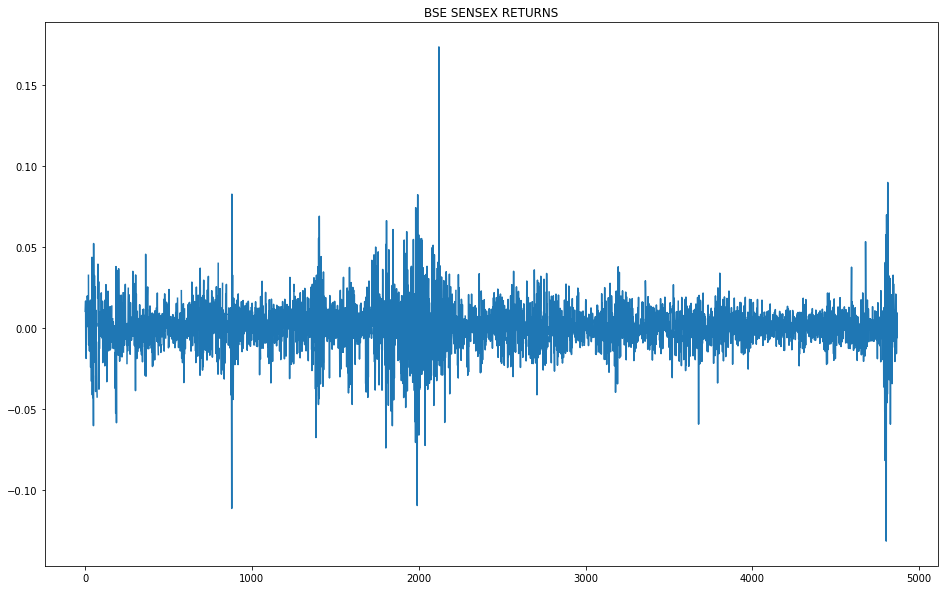

In [45]:
pdf['Returns'].plot(figsize= (16,10))
plt.title('BSE SENSEX RETURNS')
plt.show();

# Plotting Moving Average


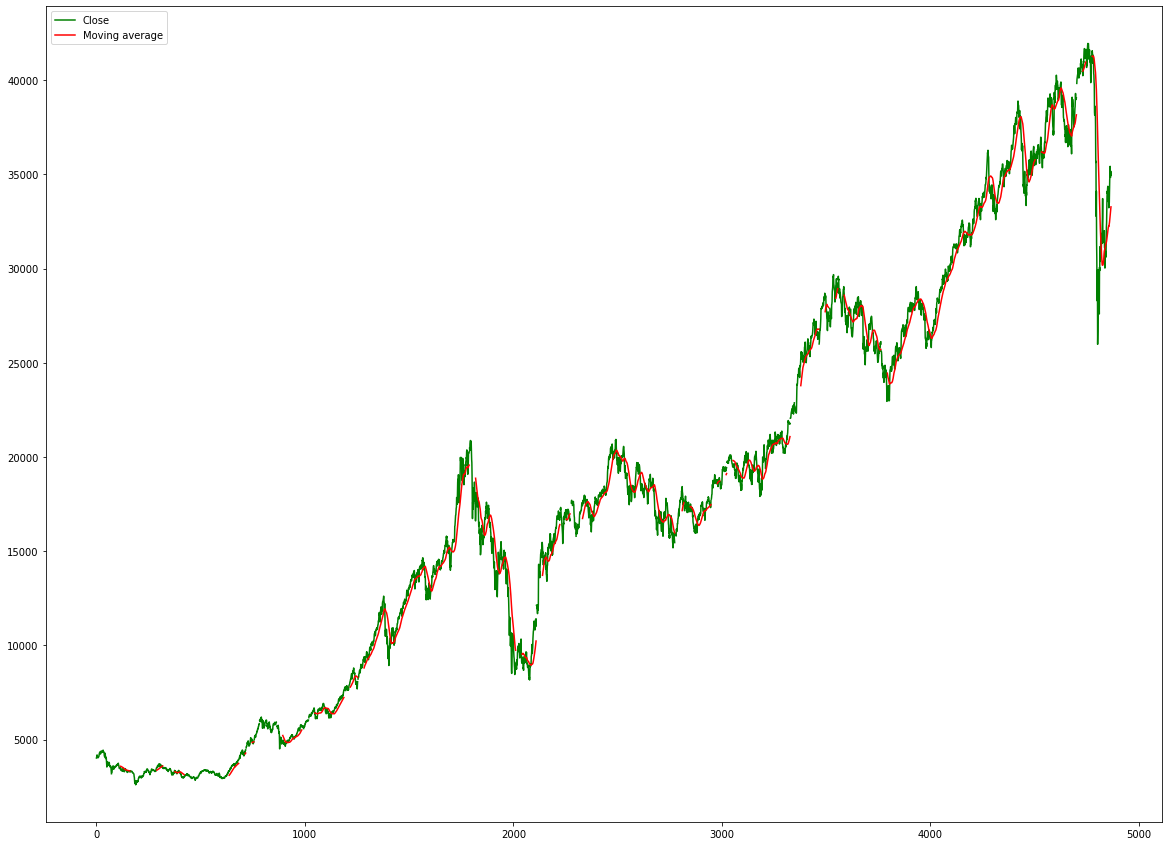

In [49]:
mov_avg = pdf['Close'].rolling(window = 30).mean()

plt.figure(figsize=(20,15))
pdf['Close'].plot(color='g',label='Close')
mov_avg.plot(color = 'r',label='Moving average')
plt.legend()
plt.show();

# Plotting Moving Standard Deviation


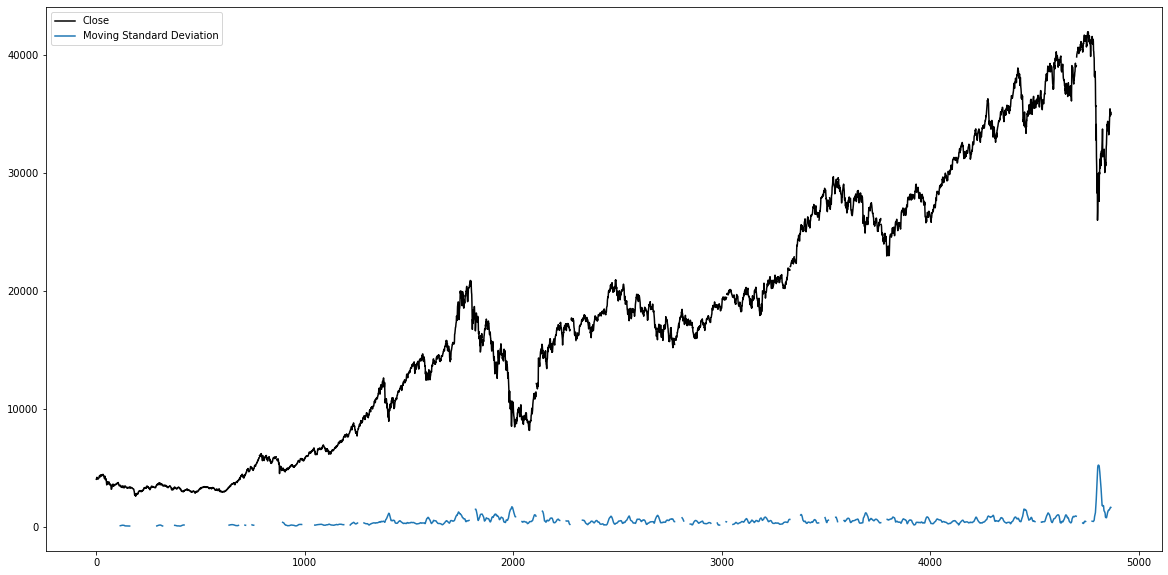

In [61]:

std = pdf['Close'].rolling(window = 30).std()

plt.figure(figsize=(20,10))
pdf['Close'].plot(color='k',label='Close')
std.plot(label = 'Moving Standard Deviation')

plt.legend();

# Concatinating the textual and numerical data frame

In [66]:
complete_df= pd.concat([pdf, df], axis= 1, join= 'inner')

In [67]:
complete_df

,Date,Open,High,Low,Close,Adj Close,Volume,Returns,publish_date,headline_text,Polarity,Subjectivity,Compound,Negative,Positive,Neutral
0,2001-01-02,3953.219971,4028.570068,3929.370117,4018.879883,4018.879883,0.0,NaN,2001-01-01,win over cena satisfying but defeating underta...,0.433333,0.633333,-0.0000,0.230,0.297,0.473
1,2001-01-03,3977.580078,4067.659912,3977.580078,4060.020020,4060.020020,0.0,0.010237,2001-01-02,Status quo will not be disturbed at Ayodhya; s...,0.151333,0.282333,-0.9811,0.122,0.071,0.807
2,2001-01-04,4180.970215,4180.970215,4109.549805,4115.370117,4115.370117,0.0,0.013633,2001-01-03,Powerless north India gropes in the dark Think...,0.088462,0.407692,-0.2640,0.122,0.111,0.766
3,2001-01-05,4116.339844,4195.009766,4115.350098,4183.729980,4183.729980,0.0,0.016611,2001-01-04,The string that pulled Stephen Hawking to Indi...,0.087961,0.446847,0.8738,0.100,0.103,0.797
4,2001-01-08,4164.759766,4206.720215,4101.529785,4120.430176,4120.430176,0.0,-0.015130,2001-01-05,Light combat craft takes India into club class...,0.262024,0.476612,0.9633,0.124,0.154,0.722
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4863,2020-06-23,35015.730469,35482.160156,34843.691406,35430.429688,35430.429688,25200.0,0.014869,2014-06-06,Restro review: Infinitea (Tea bar and restaura...,0.038086,0.406892,-0.9998,0.126,0.076,0.799
4864,2020-06-24,35679.738281,35706.550781,34794.929688,34868.980469,34868.980469,26600.0,-0.015847,2014-06-07,Home remedies to keep you super fit How to han...,0.079860,0.380602,-0.9999,0.152,0.077,0.771
4865,2020-06-25,34525.390625,35081.609375,34499.781250,34842.101563,34842.101563,24600.0,-0.000771,2014-06-08,Paneer-capsicum dry sabzi recipe Fashion week ...,0.087219,0.395196,-0.9999,0.166,0.119,0.715
4866,2020-06-26,35144.781250,35254.878906,34910.339844,35171.269531,35171.269531,24800.0,0.009447,2014-06-09,Give your dog a summer look WIFW '14: Leather ...,0.084809,0.396887,-0.9999,0.164,0.106,0.730


In [68]:
complete_df.shape

(4868, 16)

# Retainig only required features

In [69]:
final_df = complete_df[['Close', 'Polarity', 'Negative', 'Neutral', 'Positive', 'Compound', 'Subjectivity']]

In [70]:
final_df

,Close,Polarity,Negative,Neutral,Positive,Compound,Subjectivity
0,4018.879883,0.433333,0.230,0.473,0.297,-0.0000,0.633333
1,4060.020020,0.151333,0.122,0.807,0.071,-0.9811,0.282333
2,4115.370117,0.088462,0.122,0.766,0.111,-0.2640,0.407692
3,4183.729980,0.087961,0.100,0.797,0.103,0.8738,0.446847
4,4120.430176,0.262024,0.124,0.722,0.154,0.9633,0.476612
...,...,...,...,...,...,...,...
4863,35430.429688,0.038086,0.126,0.799,0.076,-0.9998,0.406892
4864,34868.980469,0.079860,0.152,0.771,0.077,-0.9999,0.380602
4865,34842.101563,0.087219,0.166,0.715,0.119,-0.9999,0.395196
4866,35171.269531,0.084809,0.164,0.730,0.106,-0.9999,0.396887


In [72]:
final_df.shape

(4868, 7)

# Standardising the Dataset

In [73]:
sc= StandardScaler()

In [77]:
DF = pd.DataFrame(sc.fit_transform(final_df))

DF.columns = final_df.columns
DF.index = final_df.index

DF.head()

,Close,Polarity,Negative,Neutral,Positive,Compound,Subjectivity
0,-1.295200,8.086045,2.723366,-7.247261,8.157552,2.014810,5.133686
1,-1.291392,1.832317,-0.924366,1.458278,-1.180896,-0.232702,-2.748011
2,-1.286268,0.438050,-0.924366,0.389634,0.471927,1.410037,0.066922
3,-1.279940,0.426957,-1.667423,1.197633,0.141363,4.016519,0.946146
4,-1.285800,4.287038,-0.856816,-0.757203,2.248711,4.221547,1.614513


In [86]:
DF.isnull().sum()

Close           75
Polarity         0
Negative         0
Neutral          0
Positive         0
Compound         0
Subjectivity     0
dtype: int64

In [90]:
DF.dropna(subset = ["Close"], inplace=True)

In [91]:
DF.isnull().sum()

Close           0
Polarity        0
Negative        0
Neutral         0
Positive        0
Compound        0
Subjectivity    0
dtype: int64

In [92]:
DF.shape

(4793, 7)

# Separating X and Y

In [93]:
y= DF['Close']

x= DF.drop(columns= ['Close'])

In [94]:
x.head()

,Polarity,Negative,Neutral,Positive,Compound,Subjectivity
0,8.086045,2.723366,-7.247261,8.157552,2.014810,5.133686
1,1.832317,-0.924366,1.458278,-1.180896,-0.232702,-2.748011
2,0.438050,-0.924366,0.389634,0.471927,1.410037,0.066922
3,0.426957,-1.667423,1.197633,0.141363,4.016519,0.946146
4,4.287038,-0.856816,-0.757203,2.248711,4.221547,1.614513


In [95]:
y.head()

0   -1.295200
1   -1.291392
2   -1.286268
3   -1.279940
4   -1.285800
Name: Close, dtype: float64

# Splitting the Dataset

In [96]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state = 123)

In [97]:
print('X_train shape: ', x_train.shape)
print('Y_train shape: ', y_train.shape)
print('X_test shape: ', x_test.shape)
print('Y_test shape: ', y_test.shape)


X_train shape:  (3834, 6)
Y_train shape:  (3834,)
X_test shape:  (959, 6)
Y_test shape:  (959,)


# Random Forest Regressor

In [98]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor()

rf.fit(x_train, y_train)

y_rf = rf.predict(x_test)

In [100]:
print('Mean Squared error: ',mean_squared_error(y_rf, y_test))

Mean Squared error:  0.3660036084342597


# Decision Tree Regressor

In [101]:
from sklearn.tree import DecisionTreeRegressor

dtr = DecisionTreeRegressor()

dtr.fit(x_train, y_train)

y_dtr = dtr.predict(x_test)

print('Mean Squared error: ',mean_squared_error(y_dtr, y_test))

Mean Squared error:  0.6783570851983494


# XGBoost Regressor

In [106]:
import xgboost

xgb = xgboost.XGBRegressor()

xgb.fit(x_train, y_train)

y_xgb = xgb.predict(x_test)

print('Mean Squared error: ',mean_squared_error(y_xgb, y_test))

[12:34:35] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Mean Squared error:  0.37384150458557397


# Conclusion

# Random Forest Regressor gave a mse = 0.366

# XGBoost Regressor gave a mse = 0.3738

## Decision Tree Regressor gave a mse = 0.6783

# This means Random Forest Regressor is the best model for regression analysis on this hybrid modle for BSE SENSEX points prediction.